In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mini-project-2/integrated_data/pituitary/pituitary_55.png
/kaggle/input/mini-project-2/integrated_data/pituitary/pituitary_36.png
/kaggle/input/mini-project-2/integrated_data/pituitary/pituitary_44.png
/kaggle/input/mini-project-2/integrated_data/pituitary/pituitary_61.png
/kaggle/input/mini-project-2/integrated_data/pituitary/pituitary_64.png
/kaggle/input/mini-project-2/integrated_data/pituitary/pituitary_45.png
/kaggle/input/mini-project-2/integrated_data/pituitary/pituitary_10.png
/kaggle/input/mini-project-2/integrated_data/pituitary/pituitary_93.png
/kaggle/input/mini-project-2/integrated_data/pituitary/pituitary_42.png
/kaggle/input/mini-project-2/integrated_data/pituitary/pituitary_0.png
/kaggle/input/mini-project-2/integrated_data/pituitary/pituitary_12.png
/kaggle/input/mini-project-2/integrated_data/pituitary/pituitary_5.png
/kaggle/input/mini-project-2/integrated_data/pituitary/pituitary_89.png
/kaggle/input/mini-project-2/integrated_data/pituitary/pituitary_8

In [2]:
import numpy as np
import cv2
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Define the data directories
data_dirs = {
    'pituitary': '/kaggle/input/mini-project-2/integrated_data/pituitary',
    'meningioma': '/kaggle/input/mini-project-2/integrated_data/meningioma',
    'normal': '/kaggle/input/mini-project-2/integrated_data/normal',
    'glioma': '/kaggle/input/mini-project-2/integrated_data/glioma'
}

# Load and preprocess MRI images
def load_data(data_dirs):
    images = []
    labels = []
    for label, dir_path in data_dirs.items():
        for img_name in os.listdir(dir_path):
            img_path = os.path.join(dir_path, img_name)
            img = cv2.imread(img_path)
            img = cv2.resize(img, (224, 224))  # Resize images to the input size required by pretrained models
            img = img / 255.0  # Normalize the image
            images.append(img)
            labels.append(label)
    images = np.array(images)
    labels = np.array(labels)
    return images, labels

images, labels = load_data(data_dirs)

# Encode labels
label_mapping = {label: idx for idx, label in enumerate(data_dirs.keys())}
labels_encoded = np.array([label_mapping[label] for label in labels])

# One-hot encode the labels
labels_encoded = to_categorical(labels_encoded)

# Split the data
X_train, X_val, y_train, y_val = train_test_split(images, labels_encoded, test_size=0.2, random_state=42)

print("Training data shape:", X_train.shape)
print("Validation data shape:", X_val.shape)


2024-07-02 18:54:30.285530: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-02 18:54:30.285619: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-02 18:54:30.421992: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Training data shape: (320, 224, 224, 3)
Validation data shape: (80, 224, 224, 3)


In [3]:
print(labels)

['pituitary' 'pituitary' 'pituitary' 'pituitary' 'pituitary' 'pituitary'
 'pituitary' 'pituitary' 'pituitary' 'pituitary' 'pituitary' 'pituitary'
 'pituitary' 'pituitary' 'pituitary' 'pituitary' 'pituitary' 'pituitary'
 'pituitary' 'pituitary' 'pituitary' 'pituitary' 'pituitary' 'pituitary'
 'pituitary' 'pituitary' 'pituitary' 'pituitary' 'pituitary' 'pituitary'
 'pituitary' 'pituitary' 'pituitary' 'pituitary' 'pituitary' 'pituitary'
 'pituitary' 'pituitary' 'pituitary' 'pituitary' 'pituitary' 'pituitary'
 'pituitary' 'pituitary' 'pituitary' 'pituitary' 'pituitary' 'pituitary'
 'pituitary' 'pituitary' 'pituitary' 'pituitary' 'pituitary' 'pituitary'
 'pituitary' 'pituitary' 'pituitary' 'pituitary' 'pituitary' 'pituitary'
 'pituitary' 'pituitary' 'pituitary' 'pituitary' 'pituitary' 'pituitary'
 'pituitary' 'pituitary' 'pituitary' 'pituitary' 'pituitary' 'pituitary'
 'pituitary' 'pituitary' 'pituitary' 'pituitary' 'pituitary' 'pituitary'
 'pituitary' 'pituitary' 'pituitary' 'pituitary' 'p

In [4]:
print(images[202],labels[202])

[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]] normal


In [5]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from sklearn.preprocessing import StandardScaler

# Load the pretrained VGG16 model without the top fully connected layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add a global spatial average pooling layer
output = base_model.output
output = tf.keras.layers.GlobalAveragePooling2D()(output)
base_model = Model(inputs=base_model.input, outputs=output)

# Extract features
def extract_features(model, data):
    features = model.predict(data)
    return features.reshape(features.shape[0], -1)


train_features = extract_features(base_model, X_train)
val_features = extract_features(base_model, X_val)

# Reshape features to 2D arrays
train_features = train_features.reshape((train_features.shape[0], -1))
val_features = val_features.reshape((val_features.shape[0], -1))

# Standardize the features
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)
val_features = scaler.transform(val_features)

print("Training features shape:", train_features.shape)
print("Validation features shape:", val_features.shape)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


2024-07-02 18:54:48.752610: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 4.63498, expected 3.85968
2024-07-02 18:54:48.752664: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3: 6.55784, expected 5.78254
2024-07-02 18:54:48.752674: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4: 6.61282, expected 5.83752
2024-07-02 18:54:48.752681: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6: 6.34499, expected 5.56968
2024-07-02 18:54:48.752689: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 7: 6.25159, expected 5.47629
2024-07-02 18:54:48.752697: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 8: 5.43964, expected 4.66434
2024-07-02 18:54:48.752710: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 9: 6.54333, expected 5.76803
2024-07-02 18:54:48.752718: E external/local_xla/xla/se

 4/10 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step

I0000 00:00:1719946503.979038     102 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


10/10 ━━━━━━━━━━━━━━━━━━━━ 18s 57ms/step
2/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step

2024-07-02 18:55:05.501562: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 3.89842, expected 3.37692
2024-07-02 18:55:05.501624: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 12: 3.13412, expected 2.61262
2024-07-02 18:55:05.501633: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 13: 3.08377, expected 2.56227
2024-07-02 18:55:05.501641: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 14: 4.1021, expected 3.5806
2024-07-02 18:55:05.501649: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 29: 3.76539, expected 3.24388
2024-07-02 18:55:05.501657: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 30: 4.19841, expected 3.6769
2024-07-02 18:55:05.501665: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 63: 3.88366, expected 3.36216
2024-07-02 18:55:05.501673: E external/local_xla/xla

3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 4s/step 
Training features shape: (320, 512)
Validation features shape: (80, 512)


In [6]:
# Import necessary libraries for SVM and evaluation
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Train an SVM classifier using the extracted features
svm_clf = SVC(kernel='linear', random_state=42)  
svm_clf.fit(train_features, np.argmax(y_train, axis=1))

# Predict on the validation set
val_predictions = svm_clf.predict(val_features)

# Convert predictions to one-hot encoded format for consistency in evaluation
val_predictions_one_hot = to_categorical(val_predictions, num_classes=len(data_dirs))

# Evaluate the model
accuracy = accuracy_score(np.argmax(y_val, axis=1), val_predictions)
report = classification_report(np.argmax(y_val, axis=1), val_predictions, target_names=list(data_dirs.keys()))

print("Validation Accuracy:", accuracy)
print("Classification Report:\n", report)

Validation Accuracy: 0.9625
Classification Report:
               precision    recall  f1-score   support

   pituitary       1.00      1.00      1.00        26
  meningioma       0.94      0.94      0.94        18
      normal       0.90      1.00      0.95        18
      glioma       1.00      0.89      0.94        18

    accuracy                           0.96        80
   macro avg       0.96      0.96      0.96        80
weighted avg       0.97      0.96      0.96        80



In [7]:
import joblib
joblib.dump(svm_clf, 'svm_model_2.pkl')

['svm_model_2.pkl']

In [8]:
import pickle

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from keras.utils import to_categorical

# Train an SVM classifier using different types of kernels
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
svm_models = {}

for kernel in kernels:
    print(f"Kernel: {kernel}")
    
    # Initialize and train SVM classifier
    svm_clf = SVC(kernel=kernel, random_state=42)
    svm_clf.fit(train_features, np.argmax(y_train, axis=1))
    
    # Save the trained model
    filename = f'svm_model_{kernel}.pkl'
    with open(filename, 'wb') as f:
        pickle.dump(svm_clf, f)
    
    svm_models[kernel] = svm_clf
    
    # Predict on the validation set
    val_predictions = svm_clf.predict(val_features)

    # Convert predictions to one-hot encoded format for consistency in evaluation
    val_predictions_one_hot = to_categorical(val_predictions, num_classes=len(data_dirs))

    # Evaluate the model
    accuracy = accuracy_score(np.argmax(y_val, axis=1), val_predictions)
    report = classification_report(np.argmax(y_val, axis=1), val_predictions, target_names=list(data_dirs.keys()))

    print("Validation Accuracy:", accuracy)
    print("Classification Report:\n", report)


Kernel: linear
Validation Accuracy: 0.9625
Classification Report:
               precision    recall  f1-score   support

   pituitary       1.00      1.00      1.00        26
  meningioma       0.94      0.94      0.94        18
      normal       0.90      1.00      0.95        18
      glioma       1.00      0.89      0.94        18

    accuracy                           0.96        80
   macro avg       0.96      0.96      0.96        80
weighted avg       0.97      0.96      0.96        80

Kernel: poly
Validation Accuracy: 0.75
Classification Report:
               precision    recall  f1-score   support

   pituitary       0.95      0.77      0.85        26
  meningioma       1.00      0.61      0.76        18
      normal       1.00      0.61      0.76        18
      glioma       0.49      1.00      0.65        18

    accuracy                           0.75        80
   macro avg       0.86      0.75      0.76        80
weighted avg       0.87      0.75      0.77        80



Kernel: linear
Validation Accuracy: 0.9625
Classification Report:
               precision    recall  f1-score   support

   pituitary       1.00      1.00      1.00        26
  meningioma       0.94      0.94      0.94        18
      normal       0.90      1.00      0.95        18
      glioma       1.00      0.89      0.94        18

    accuracy                           0.96        80
   macro avg       0.96      0.96      0.96        80
weighted avg       0.97      0.96      0.96        80

Kernel: poly
Validation Accuracy: 0.75
Classification Report:
               precision    recall  f1-score   support

   pituitary       0.95      0.77      0.85        26
  meningioma       1.00      0.61      0.76        18
      normal       1.00      0.61      0.76        18
      glioma       0.49      1.00      0.65        18

    accuracy                           0.75        80
   macro avg       0.86      0.75      0.76        80
weighted avg       0.87      0.75      0.77        80



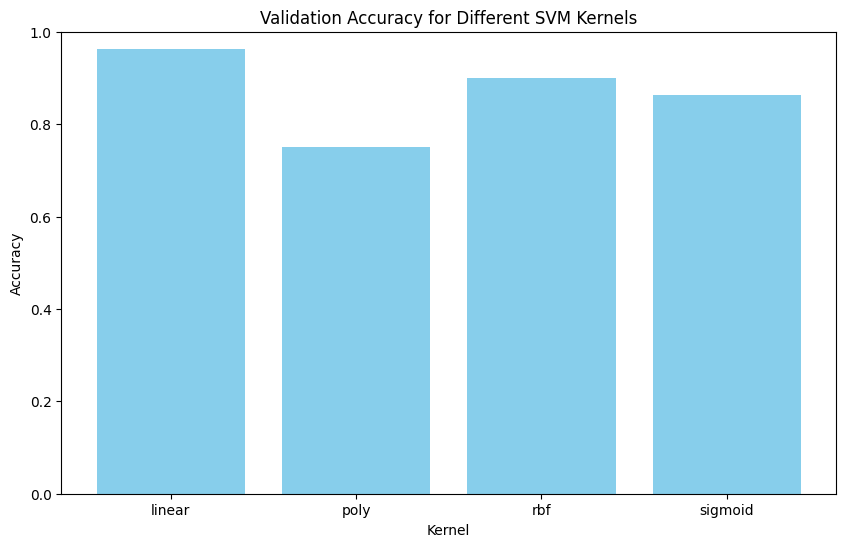

In [9]:
import pickle
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from keras.utils import to_categorical

# Train an SVM classifier using different types of kernels
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
svm_models = {}
accuracies = []

for kernel in kernels:
    print(f"Kernel: {kernel}")
    
    # Initialize and train SVM classifier
    svm_clf = SVC(kernel=kernel, random_state=42)
    svm_clf.fit(train_features, np.argmax(y_train, axis=1))
    
    # Save the trained model
    filename = f'svm_model_{kernel}.pkl'
    with open(filename, 'wb') as f:
        pickle.dump(svm_clf, f)
    
    svm_models[kernel] = svm_clf
    
    # Predict on the validation set
    val_predictions = svm_clf.predict(val_features)

    # Convert predictions to one-hot encoded format for consistency in evaluation
    val_predictions_one_hot = to_categorical(val_predictions, num_classes=len(data_dirs))

    # Evaluate the model
    accuracy = accuracy_score(np.argmax(y_val, axis=1), val_predictions)
    accuracies.append(accuracy)
    report = classification_report(np.argmax(y_val, axis=1), val_predictions, target_names=list(data_dirs.keys()))

    print("Validation Accuracy:", accuracy)
    print("Classification Report:\n", report)

# Visualize the comparison of accuracies
plt.figure(figsize=(10, 6))
plt.bar(kernels, accuracies, color='skyblue')
plt.xlabel('Kernel')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy for Different SVM Kernels')
plt.ylim(0, 1)
plt.show()


In [10]:
import numpy as np
import cv2
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.models import Model
from keras.layers import GlobalAveragePooling2D
import joblib

# Load the base model and add a GlobalAveragePooling layer
base_model = VGG16(weights='imagenet', include_top=False)
model = Model(inputs=base_model.input, outputs=GlobalAveragePooling2D()(base_model.output))

# Load the SVM model
svm_model = joblib.load('/kaggle/working/svm_model_2.pkl')

# Define a function to preprocess the input image
def preprocess_input_image(image_path):
    try:
        img = cv2.imread(image_path)
        if img is None:
            raise FileNotFoundError("Unable to read the image. Please check the file path.")
        img = cv2.resize(img, (224, 224))  # Resize to match the input size of the VGG16 model
        img = img.astype(np.float32)  # Convert to float32
        img = preprocess_input(img)  # Preprocess the image for VGG16
        return img
    except Exception as e:
        print("Error while preprocessing the input image:", e)
        return None

# Define a function to extract features from the preprocessed image
def extract_features(model, img):
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    features = model.predict(img)
    return features  # Return the features as is

# Define a function to make predictions on the input image
def predict_image(image_path, svm_model, model):
    preprocessed_img = preprocess_input_image(image_path)
    if preprocessed_img is None:
        return None
    
    img_features = extract_features(model, preprocessed_img)
    
    prediction = svm_model.predict(img_features)
    return prediction

# Map the predicted label to the corresponding tumor type
label_mapping = {0: 'Pituitary', 1: 'Meningioma', 2: 'Normal', 3: 'Glioma'}

# Input image path
image_path = "/kaggle/input/prediction/mri_input_for_prediction/4.png"

# Make prediction
predicted_label = predict_image(image_path, svm_model, model)

if predicted_label is not None:
    predicted_tumor_type = label_mapping.get(predicted_label[0], "Unknown")
    print("Predicted Tumor Type:", predicted_tumor_type)
else:
    print("Failed to make a prediction.")


2024-07-02 18:55:14.948709: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 4.42855, expected 3.64542
2024-07-02 18:55:14.948768: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1: 5.87036, expected 5.08723
2024-07-02 18:55:14.948784: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2: 6.04003, expected 5.2569
2024-07-02 18:55:14.948801: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3: 6.22034, expected 5.43722
2024-07-02 18:55:14.948814: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4: 4.90026, expected 4.11714
2024-07-02 18:55:14.948824: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 5: 5.21068, expected 4.42756
2024-07-02 18:55:14.948836: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6: 5.92061, expected 5.13748
2024-07-02 18:55:14.948846: E external/local_xla/xla/ser

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted Tumor Type: Normal


In [12]:
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import confusion_matrix, accuracy_score
from tensorflow.keras.utils import to_categorical
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import joblib
import cv2
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
import os

# Define the data directories
data_dirs = {
    'pituitary': '/kaggle/input/mini-project-2/integrated_data/pituitary',
    'meningioma': '/kaggle/input/mini-project-2/integrated_data/meningioma',
    'normal': '/kaggle/input/mini-project-2/integrated_data/normal',
    'glioma': '/kaggle/input/mini-project-2/integrated_data/glioma'
}

# Load and preprocess MRI images
def load_data(data_dirs):
    images = []
    labels = []
    for label, dir_path in data_dirs.items():
        for img_name in os.listdir(dir_path):
            img_path = os.path.join(dir_path, img_name)
            img = cv2.imread(img_path)
            img = cv2.resize(img, (224, 224))  # Resize images to the input size required by pretrained models
            img = img / 255.0  # Normalize the image
            images.append(img)
            labels.append(label)
    images = np.array(images)
    labels = np.array(labels)
    return images, labels

images, labels = load_data(data_dirs)

# Encode labels
label_mapping = {label: idx for idx, label in enumerate(data_dirs.keys())}
labels_encoded = np.array([label_mapping[label] for label in labels])

# One-hot encode the labels
labels_encoded = to_categorical(labels_encoded)

# Split the data into training and validation sets (for holdout technique)
X_train, X_test, y_train, y_test = train_test_split(images, labels_encoded, test_size=0.3, random_state=42)

# Load the pretrained VGG16 model without the top fully connected layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add a global spatial average pooling layer
output = base_model.output
output = tf.keras.layers.GlobalAveragePooling2D()(output)
base_model = Model(inputs=base_model.input, outputs=output)

# Extract features
def extract_features(model, data):
    features = model.predict(data)
    return features.reshape(features.shape[0], -1)

train_features = extract_features(base_model, X_train)
test_features = extract_features(base_model, X_test)

# Standardize the features
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)
test_features = scaler.transform(test_features)

# Train and evaluate the SVM classifier using the holdout technique
svm_clf = SVC(kernel='linear', random_state=42)  
svm_clf.fit(train_features, np.argmax(y_train, axis=1))

# Predict on the test set
test_predictions = svm_clf.predict(test_features)

# Calculate accuracy using confusion matrix
conf_matrix = confusion_matrix(np.argmax(y_test, axis=1), test_predictions)
TP = np.diag(conf_matrix)
FP = np.sum(conf_matrix, axis=0) - TP
FN = np.sum(conf_matrix, axis=1) - TP
TN = np.sum(conf_matrix) - (FP + FN + TP)
accuracy = (TP + TN) / (TP + FP + TN + FN)

print("Holdout Technique Accuracy:", np.mean(accuracy))

# 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
accuracies = []

for train_index, test_index in kf.split(images):
    X_train, X_test = images[train_index], images[test_index]
    y_train, y_test = labels_encoded[train_index], labels_encoded[test_index]

    train_features = extract_features(base_model, X_train)
    test_features = extract_features(base_model, X_test)

    train_features = scaler.fit_transform(train_features)
    test_features = scaler.transform(test_features)

    svm_clf = SVC(kernel='linear', random_state=42)
    svm_clf.fit(train_features, np.argmax(y_train, axis=1))

    test_predictions = svm_clf.predict(test_features)
    
    conf_matrix = confusion_matrix(np.argmax(y_test, axis=1), test_predictions)
    TP = np.diag(conf_matrix)
    FP = np.sum(conf_matrix, axis=0) - TP
    FN = np.sum(conf_matrix, axis=1) - TP
    TN = np.sum(conf_matrix) - (FP + FN + TP)
    accuracy = (TP + TN) / (TP + FP + TN + FN)
    accuracies.append(np.mean(accuracy))

print("5-Fold Cross-Validation Accuracy:", np.mean(accuracies))


8/9 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step

2024-07-02 19:13:02.460088: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 50188: 2.79675, expected 2.40555
2024-07-02 19:13:02.460140: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 50357: 2.77153, expected 2.38033
2024-07-02 19:13:02.460149: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 50399: 2.10715, expected 1.71595
2024-07-02 19:13:02.460178: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 55327: 2.85302, expected 2.46182
2024-07-02 19:13:02.460921: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 200704: 4.41732, expected 3.71194
2024-07-02 19:13:02.460952: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 200705: 5.86452, expected 5.15914
2024-07-02 19:13:02.460961: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 200706: 5.41314, expected 4.70776
2024-07-02 19:13:02.4609

9/9 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Holdout Technique Accuracy: 0.9583333333333333
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
5-Fold Cross-Validation Accuracy: 0.96125
